# vSEIR model in monkeypox modelling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv('timeseries-country-confirmed.csv',usecols=['Date','Cases','Country'])
C1=data[data['Country']=='United States']
C1=C1[C1['Date']>'2022/5/17']
date = np.array(C1['Date'].astype(str))
xs = [datetime.strptime(d, '%Y/%m/%d').date() for d in date]
C=C1['Cases'].values

In [3]:
C1

,Date,Cases,Country
7693,2022/5/18,0,United States
7694,2022/5/19,1,United States
7695,2022/5/20,4,United States
7696,2022/5/21,0,United States
7697,2022/5/22,1,United States
...,...,...,...
7802,2022/9/4,45,United States
7803,2022/9/5,20,United States
7804,2022/9/6,25,United States
7805,2022/9/7,677,United States


In [4]:
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re

array([  0.71428571,   0.92857143,   1.07142857,   1.28571429,
         1.28571429,   1.35714286,   1.57142857,   1.78571429,
         2.14285714,   2.5       ,   2.92857143,   3.21428571,
         3.21428571,   3.21428571,   4.21428571,   4.5       ,
         4.85714286,   5.07142857,   6.07142857,   6.85714286,
         7.28571429,   7.71428571,   9.07142857,   9.64285714,
        10.21428571,  11.28571429,  12.42857143,  13.21428571,
        13.28571429,  14.        ,  15.35714286,  17.28571429,
        18.78571429,  20.21428571,  21.21428571,  25.35714286,
        27.64285714,  31.21428571,  35.        ,  38.14285714,
        40.35714286,  42.78571429,  44.92857143,  51.42857143,
        56.35714286,  62.        ,  68.57142857,  71.78571429,
        74.42857143,  84.57142857,  91.85714286, 100.92857143,
       109.64285714, 121.14285714, 125.57142857, 127.64285714,
       146.71428571, 159.78571429, 173.71428571, 184.21428571,
       198.57142857, 204.07142857, 207.5       , 231.07

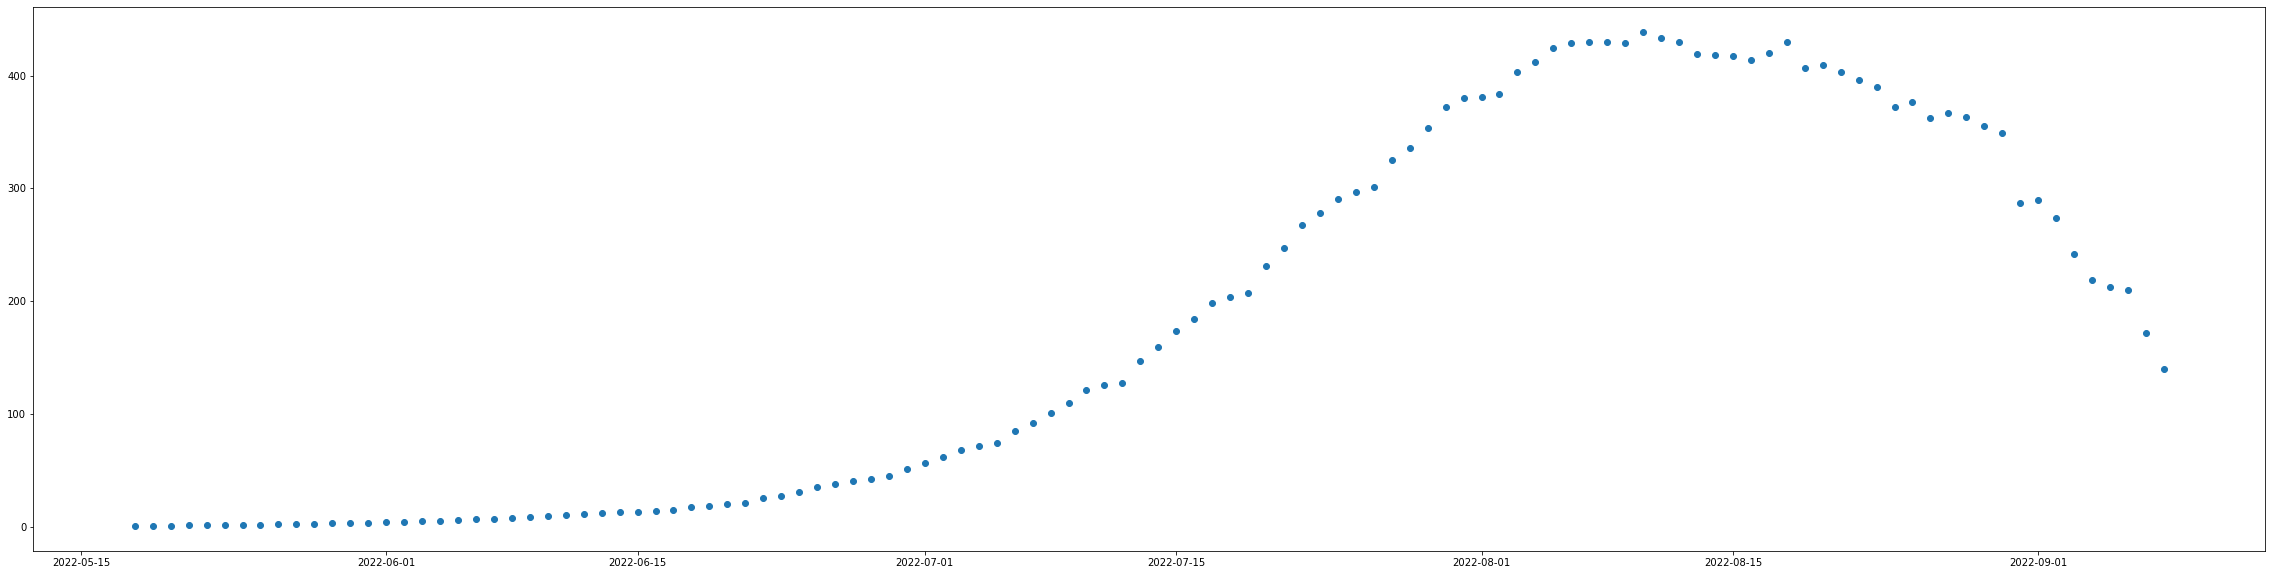

In [5]:
C =moving_average(C,14)
C
plt.figure(figsize=(40, 10))
plt.scatter(xs,C)
C

In [6]:
def RLS(x,y):
    l=0.65 
    R={};z={};P={};w={};k={}
    R[0]=x[0]*x[0]
    z[0]=x[0]*y[0]
    P[0]=1/R[0]
    w[0]=(1/R[0])*z[0]
    for i in range(1,len(x)):
        k[i]=(P[i-1]*x[i])/(l+x[i]*P[i-1]*x[i])
        P[i]=(1/l)*P[i-1]-(1/l)*k[i]*x[i]*P[i-1]
        w[i]=w[i-1]-k[i]*(x[i]*w[i-1]-y[i])
    return w
      


In [7]:
q=1/8.7
E=np.zeros(len(C))
for i in range(len(C)):
    E[i]=C[i]/q #估计E,E时变

In [8]:
Su={};I={};SA={};X={};Y={};Bu={};R={};T={};Rt={};
Ep={};
theta=0.76#55以下占比
SA[0]=332854719*(1-theta)
Su[0]=332854719*theta
I[0]=26#当前感染者
Ep[0]=26*8#感染者乘以8
R[0]=0
T[0]=0
d=0.0081
N=332854719#地区总人数
q=1/8.7 #潜伏期倒数 转化率
g=1/21 #康复率 感染时间倒数
for t in range(len(C)-1):
        I[t + 1] = I[t] + 0.983* q * E[t] - g * I[t]
        R[t + 1] = R[t] + g *(1-0.983)* E[t] + g * I[t] 
        Y[t] = E[t + 1] - E[t] + I[t+1]-I[t] +R[t+1]-R[t]
        X[t] = (0.15 * SA[t] * I[t] + Su[t] * I[t]) / N
        Bu = RLS(X, Y)
        SA[t + 1] = SA[t] - Bu[t] * 0.15 * SA[t] * I[t] / N
        Su[t + 1] = Su[t] - Bu[t] * Su[t] * I[t] / N
        Rt[t] = 0.983 / g  * (Bu[t] * 0.15 * SA[t] + Bu[t] * Su[t]) / N
        Ep[t + 1] = Ep[t] + Bu[t] * 0.15 * SA[t] * I[t] / N + Bu[t] * Su[t] * I[t] / N - q * Ep[t]
        T[t + 1] = T[t] + 0.983* q * Ep[t]
#for t in range(len(C) - 1):
#    Y[t] = E[t + 1] - E[t] + I[t+1]- I[t] +R[t+1]-R[t]
#    X[t] = (0.15 * SA[t] * I[t] + Su[t] * I[t]) / N
#    Bu = RLS(X, Y)
#    Rt[t] = q / (g * (q + g)) * (Bu[t] * 0.15 * SA[t] + Bu[t] * Su[t]) / N


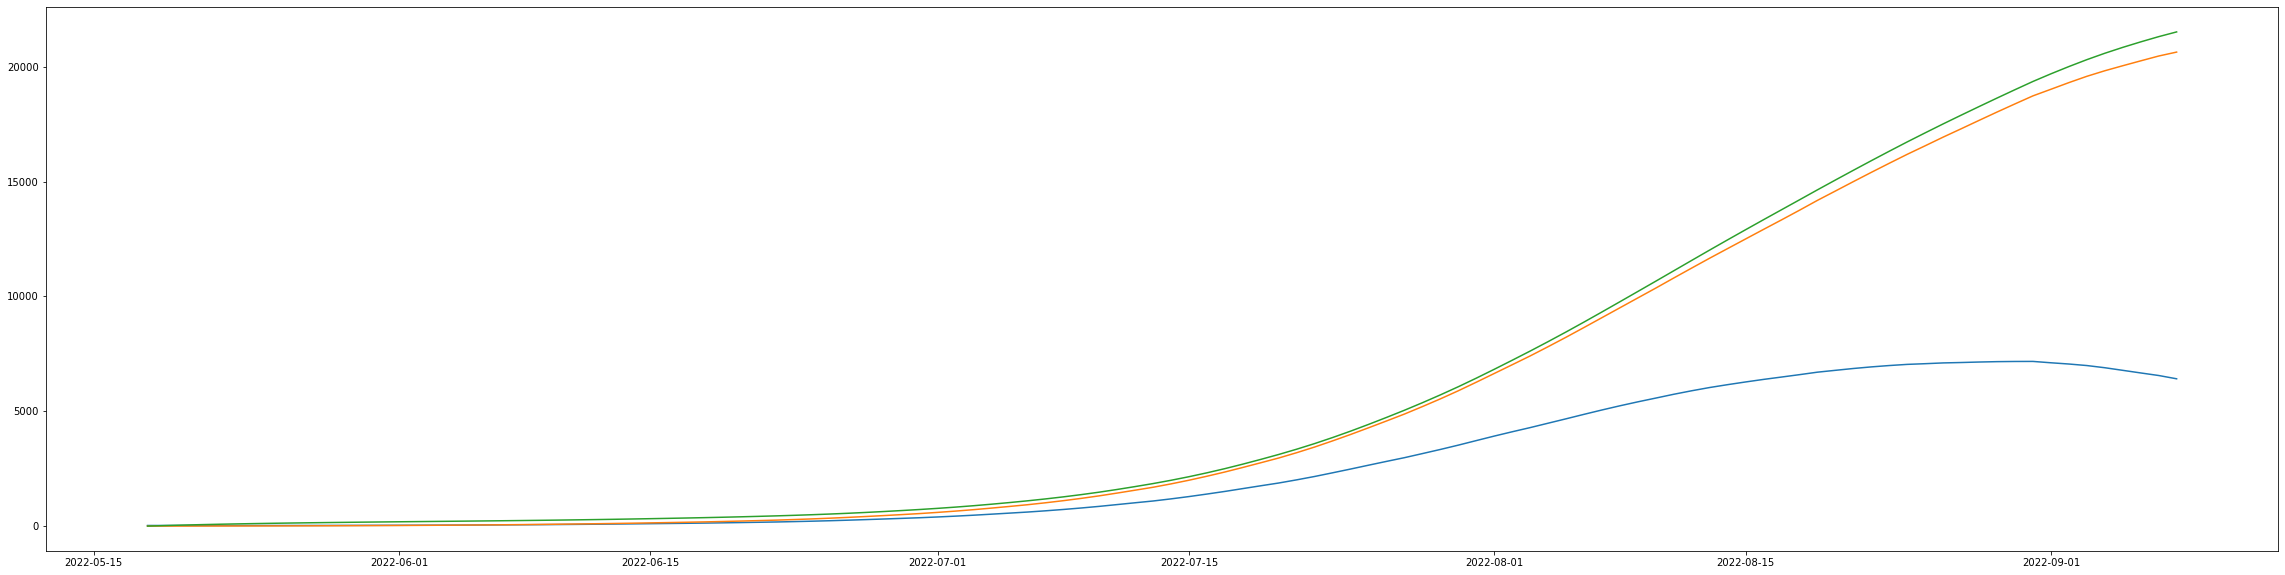

In [9]:
lst = list(I.values())
plt.figure(figsize=(40, 10))
plt.plot(xs,lst)
total={}
total[0]=0
for i in range(len(C)-1):
    total[i+1]=total[i]+C[i]
plt.plot(xs,list(total.values()))
plt.plot(xs,list(T.values()))

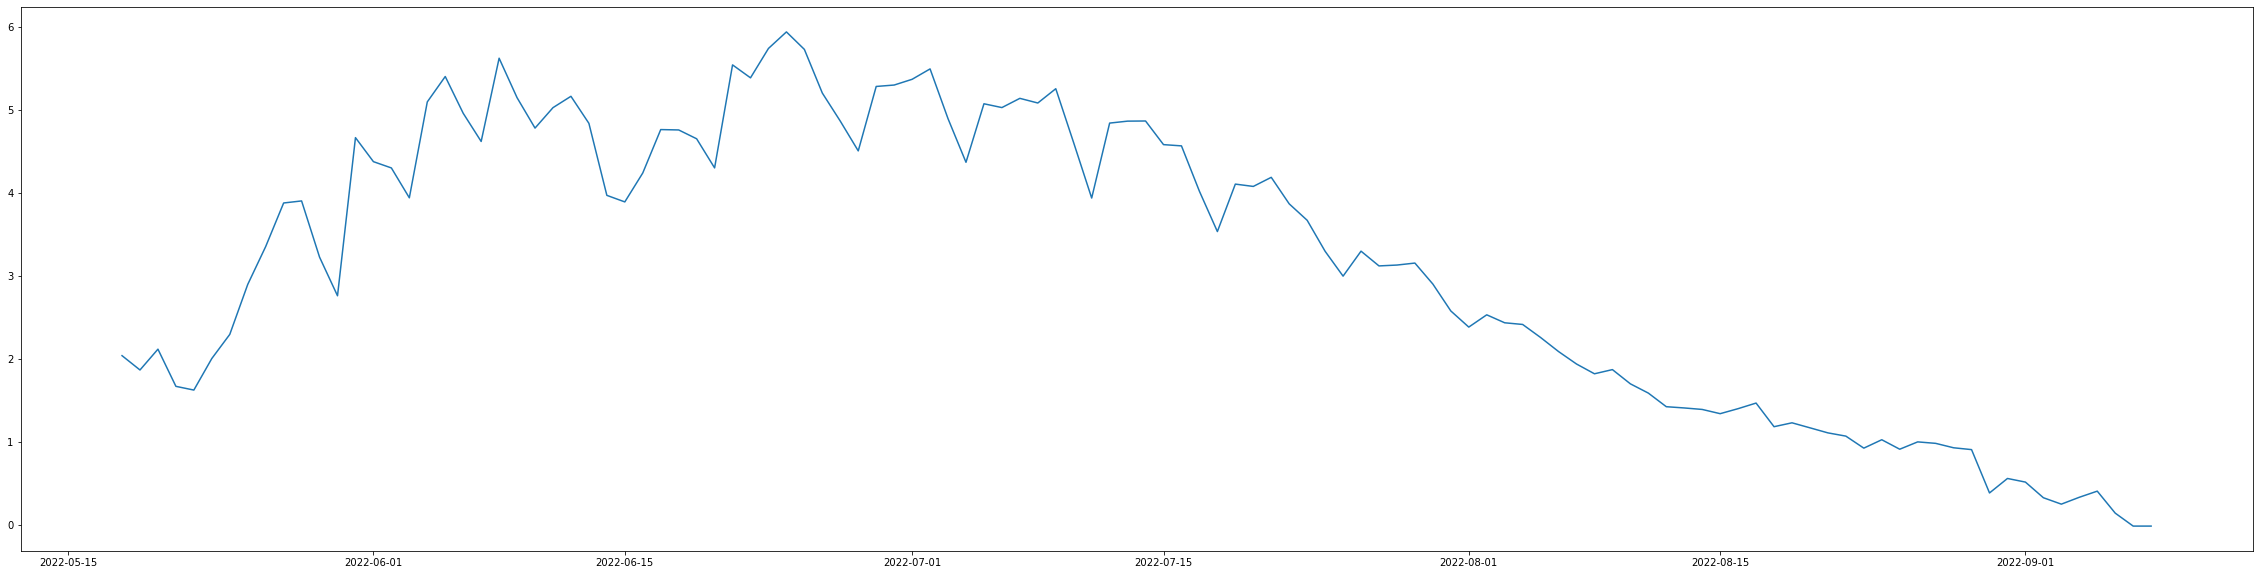

In [10]:
plt.figure(figsize=(40, 10))
Rt[len(C)-1]=Rt[len(C)-2]
plt.plot(xs,list(Rt.values()))

# vSEIRD model in COVID-19 modelling

In [11]:
data = pd.read_csv('USA.csv')
C1=data['United States']
C2=data['Death']
date = np.array(data['Date'].astype(str))
xs = [datetime.strptime(d, '%Y/%m/%d').date() for d in date]
C=C1.values
Cr=C2.values
C

array([    2,     1,     0,     1,     0,     0,     0,     0,     1,
           1,     3,     4,     2,     0,     0,     1,     0,     0,
           0,     0,     2,     1,     1,     0,     0,     2,     5,
           3,     1,     5,     8,     0,     4,     4,     8,     5,
           4,     9,    18,    35,    51,    70,    78,   130,   146,
         214,   391,   497,   529,   734,   954,  1219,  2161,  2366,
        3214,  4891,  6111,  7544,  9148, 10854, 10691, 11397, 14091,
       18560, 20211, 20822, 26346, 15291, 23754, 28447, 29976, 31784,
       32556, 27081, 28642, 29267, 34310, 34877, 32724, 32126, 27194,
       25021, 25185, 25308, 31763, 30311, 27728, 27007, 26152, 25301,
       31221, 33111, 34985, 32838, 26630, 24024, 23767, 27060, 31411,
       32038, 28297, 26748, 21515, 22894, 25472, 29335, 28083, 25919,
       21648, 19711, 24133, 17464, 34534, 26790], dtype=int64)

In [12]:
def RLS(x,y):
    l=0.65
    R={};z={};P={};w={};k={}
    R[0]=x[0]*x[0]
    z[0]=x[0]*y[0]
    P[0]=1/R[0]
    w[0]=(1/R[0])*z[0]
    for i in range(1,len(x)):
        k[i]=(P[i-1]*x[i])/(l+x[i]*P[i-1]*x[i])
        P[i]=(1/l)*P[i-1]-(1/l)*k[i]*x[i]*P[i-1]
        w[i]=w[i-1]-k[i]*(x[i]*w[i-1]-y[i])
    return w

array([2.85714286e-01, 2.85714286e-01, 3.57142857e-01, 4.28571429e-01,
       6.42857143e-01, 9.28571429e-01, 1.07142857e+00, 1.07142857e+00,
       9.28571429e-01, 9.28571429e-01, 9.28571429e-01, 8.57142857e-01,
       8.57142857e-01, 8.57142857e-01, 1.00000000e+00, 1.07142857e+00,
       1.07142857e+00, 1.00000000e+00, 7.85714286e-01, 6.42857143e-01,
       8.57142857e-01, 1.07142857e+00, 1.14285714e+00, 1.42857143e+00,
       2.00000000e+00, 2.00000000e+00, 2.28571429e+00, 2.57142857e+00,
       3.00000000e+00, 3.28571429e+00, 3.50000000e+00, 4.14285714e+00,
       5.42857143e+00, 7.78571429e+00, 1.10714286e+01, 1.58571429e+01,
       2.13571429e+01, 3.02857143e+01, 4.01428571e+01, 5.54285714e+01,
       8.30714286e+01, 1.18285714e+02, 1.55500000e+02, 2.07571429e+02,
       2.75428571e+02, 3.61857143e+02, 5.14928571e+02, 6.81428571e+02,
       9.07357143e+02, 1.25171429e+03, 1.68264286e+03, 2.21221429e+03,
       2.85521429e+03, 3.61521429e+03, 4.35092857e+03, 5.12950000e+03,
      

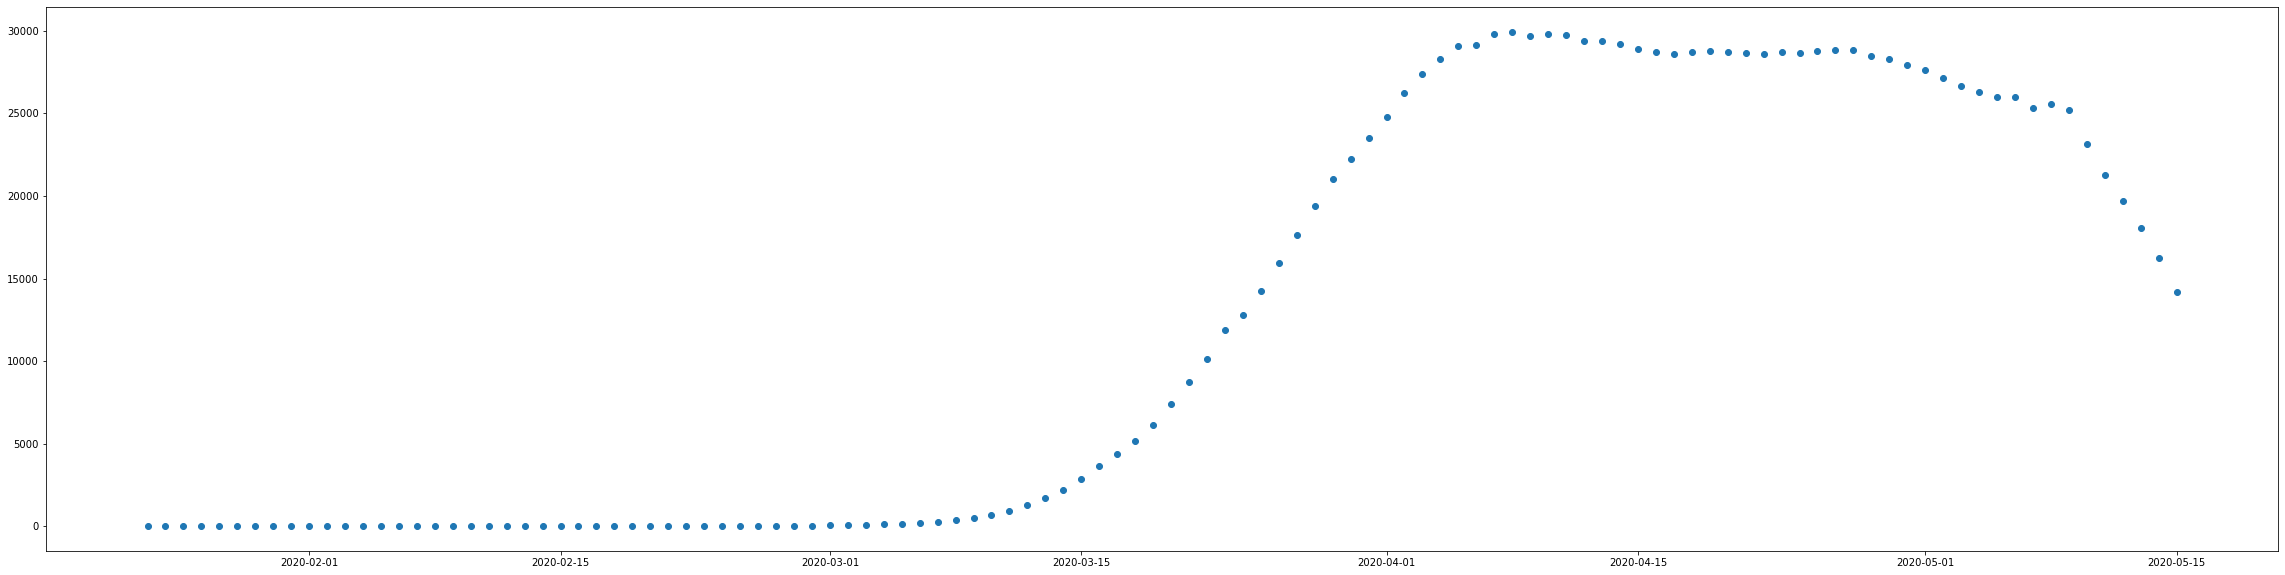

In [13]:
C =moving_average(C,14)
plt.figure(figsize=(40, 10))
plt.scatter(xs,C)
C

In [14]:
q=1/6.2
Ec=np.zeros(len(C))
for i in range(len(C)):
    Ec[i]=C[i]/q #估计E,E时变

In [15]:
Suc={};Ic={};SAc={};Xc={};Yc={};Buc={};Rc={};Tc={};Rtc={};
Epc={};Rd={};Yr={};Xr={};
Suc[0]=332854719
Ic[0]=18#当前感染者
Epc[0]=18*6#感染者乘以6
Rc[0]=0
Tc[0]=0
Rd[0]=0
d=0.0081
Nc=332854719#地区总人数
q=1/6.2 #潜伏期倒数 转化率
g=1/14 #康复率 感染时间倒数
gd={};
N=332854719
for t in range(len(C)-1):
    Ic[t + 1] = Ic[t] + 1* q * Ec[t] - g * Ic[t]-(Cr[t+1]-Cr[t])
    Rc[t + 1] = Rc[t] + g * Ic[t] 
    Yc[t] = Ec[t + 1] - Ec[t] + Ic[t+1]-Ic[t] +Rc[t+1]-Rc[t]+ Cr[t+1]-Cr[t]
    Xc[t] = ( Suc[t] * Ic[t]) / N
    Buc=RLS(Xc,Yc)
    Yr[t]=Cr[t+1]-Cr[t]
    Xr[t]=Ic[t]
    gd = RLS(Xr,Yr)
    Suc[t+1]=Suc[t]-Buc[t]*Suc[t]*Ic[t]/Nc
    Epc[t+1]=Epc[t]+Buc[t]*Suc[t]*Ic[t]/Nc-q*Epc[t]
    Tc[t+1]=Tc[t]+q*Epc[t]
    Rtc[t]=(Buc[t]*Suc[t])/((g+gd[t])*Nc)


dict_values([0, 17.419354838709676, 32.075219265645906, 44.45355710564925, 54.93800612907379, 63.89983340183425, 71.65705146707185, 78.41701730016706, 84.31208511978282, 89.415060607835, 93.85100252126686, 97.72469262863224, 101.10041381532018, 104.06196155065058, 106.67797771363176, 109.05402262534905, 111.24494991847538, 113.2721842245623, 115.13216811977668, 116.77756421066817, 118.20728431238778, 119.54810087358048, 120.88280071506563, 122.22289889831025, 123.65520511269503, 125.34230788098934, 127.19354460250207, 129.2691410144835, 131.6055369060158, 134.28923152352178, 137.31648195213313, 140.65751146627815, 144.48354119700787, 149.1831436957524, 155.49238412361802, 164.35102170380404, 177.20623056418765, 195.44223870153957, 221.95397155881753, 258.80935795247944, 310.68113446332865, 387.0560383067196, 498.2964918200354, 651.0921807910397, 858.8239790840232, 1137.2925539335322, 1505.6635220767482, 2015.8678206837421, 2700.913696668962, 3616.6951141430454, 4865.344398527926, 6550.

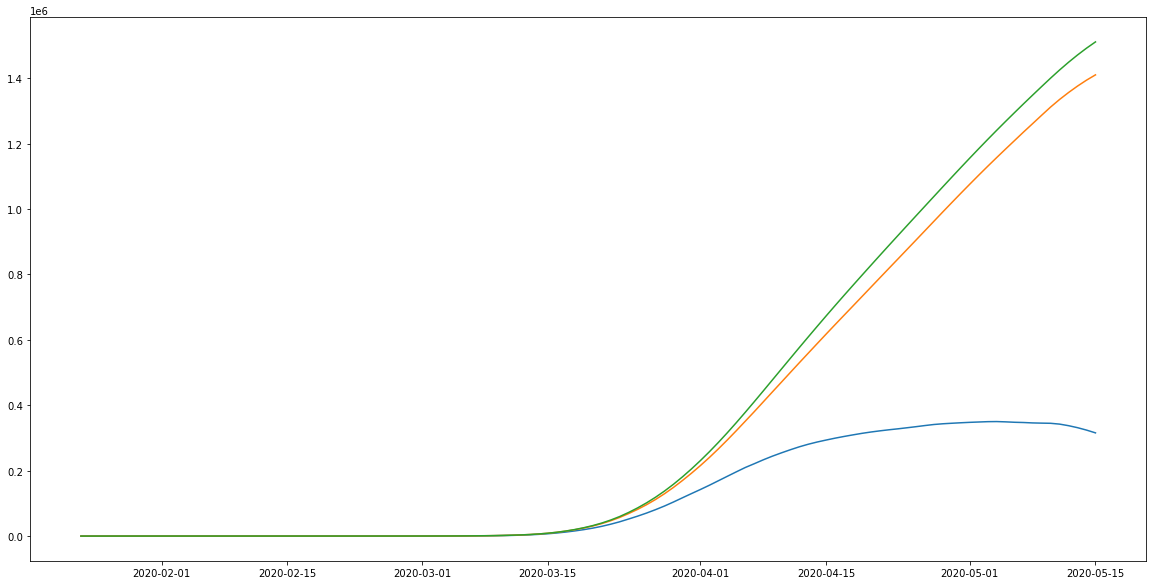

In [16]:
lst = list(Ic.values())
plt.figure(figsize=(20, 10))
plt.plot(xs,lst)
total={}
total[0]=0
for i in range(len(C)-1):
    total[i+1]=total[i]+C[i]
plt.plot(xs,list(total.values()))
plt.plot(xs,list(Tc.values()))
Tc.values()

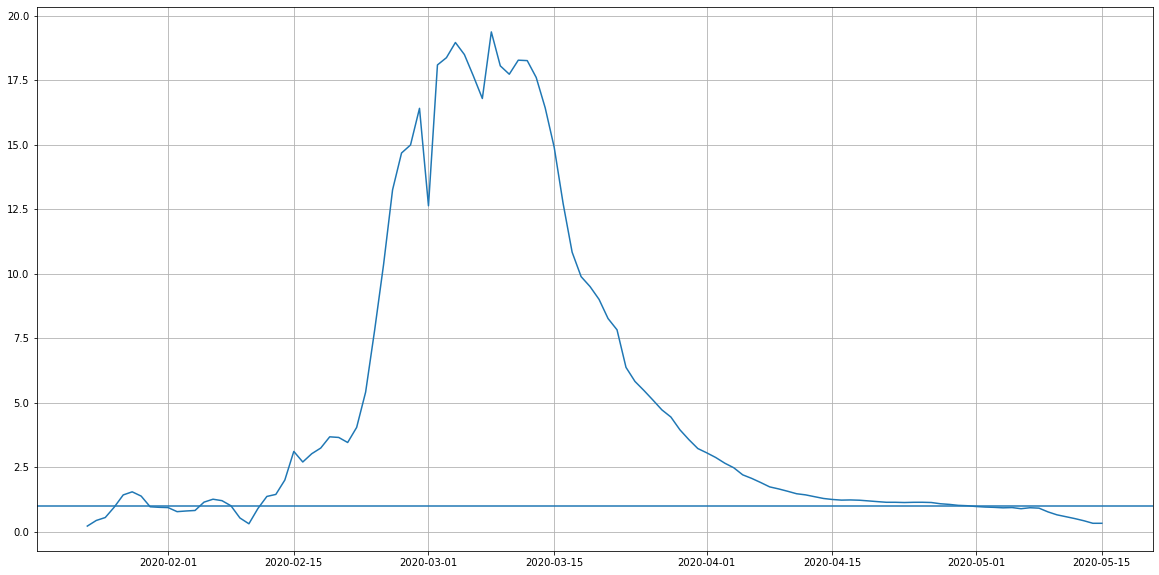

In [17]:
plt.figure(figsize=(20, 10))
Rtc[len(C)-1]=Rtc[len(C)-2]
plt.plot(xs,list(Rtc.values()))
plt.grid()
plt.axhline(y=1)